Demonstrate how LTP-IE can be used to store and decode paired and triplet associations.

In [1]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import numpy as np

from aux import sgmd
from disp import set_font_size, set_n_x_ticks, set_n_y_ticks
from replay import plot, smln


M = {
    # Exc. PC membrane
    'T_M_PC': 0.05, 'E_L_PC': -0.068, 'V_TH_PC': -0.036, 'V_R_PC': -0.068, 'T_R_PC': 0.008,
    
    # Exc. PC architecture
    'N_PC': 4000,
    'W_PC_PC': 0.034, 'L_PC_PC': 0.0835, 'W_MIN_PC_PC': 0.001,
    
    # "Place-tuned" PC inputs
    'R_MAX': 20, 'L_PL': .15,
    'W_PC_PL': 0.02, 'S_PC_PL': 0,
    
    # Inh. membrane
    'T_M_INH': 0.009, 'E_L_INH': -0.058, 'V_TH_INH': -0.036, 'V_R_INH': -0.058, 'T_R_INH': 0.002,  # unused (presently)
    
    # Inh. architecture
    'N_INH': 100,
    
    # gating inputs
    'W_PC_G': 0.008216, 'S_PC_G': 0,
    
    # synaptic reversal potentials & time constants
    'E_E': 0, 'E_I': -0.08, 'T_E': 0.002, 'T_I': 0.005, 
    
    # Gating input firing rates for traj and replay epochs
    'R_G': 105, 
    
    # potentiation
    'SGM_MAX': 2, 'B_SGM': 1, 'R_SGM': 10
}

S = {
    "RNG_SEED": 0,
    "DT": 0.0005, "BOX_H": 4, "BOX_W": 4, "X_TRG": 2, "Y_TRG": -1.75,
    
    'SPD': 0.2,
    
    'TRG': [
        {'T': 0.75, 'A': 0.008, 'R': 0.4, 'D': 0.003, 'X': 2, 'Y': -1.75},
        {'T': 1.25, 'A': 0.008, 'R': 0.4, 'D': 0.003, 'X': -2, 'Y': 1.75},
        {'T': 1.75, 'A': 0.008, 'R': 0.4, 'D': 0.003, 'X': 2, 'Y': -1.75},
        {'T': 2.25, 'A': 0.008, 'R': 0.4, 'D': 0.003, 'X': -2, 'Y': 1.75},
    ],
    
    "schedule": {"D_SMLN": 3},
    
    "metrics": {
        "WDW": 0.3, "MIN_SCALE_TRJ": 1.25,
        "MIN_FRAC_SPK_TRJ": 0.75, "MAX_AVG_SPK_CT_TRJ": 3, "TRJ_NON_TRJ_SPK_RATIO": 1.5,
    }
}

Running smln...
Smln complete.


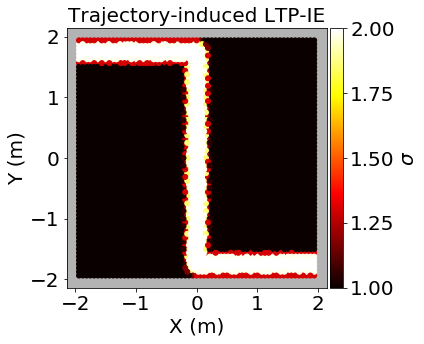

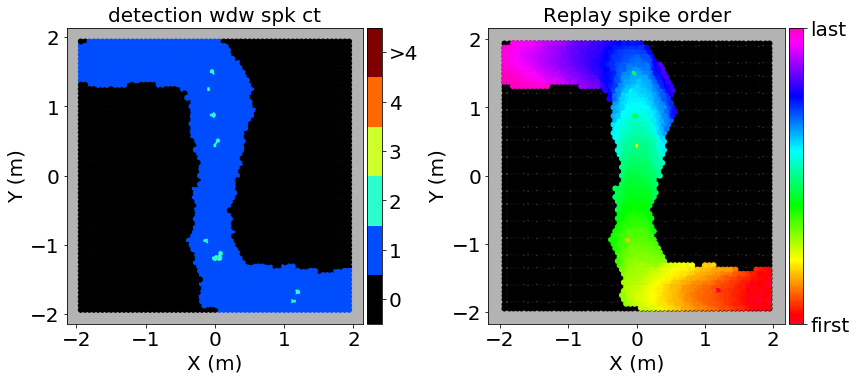

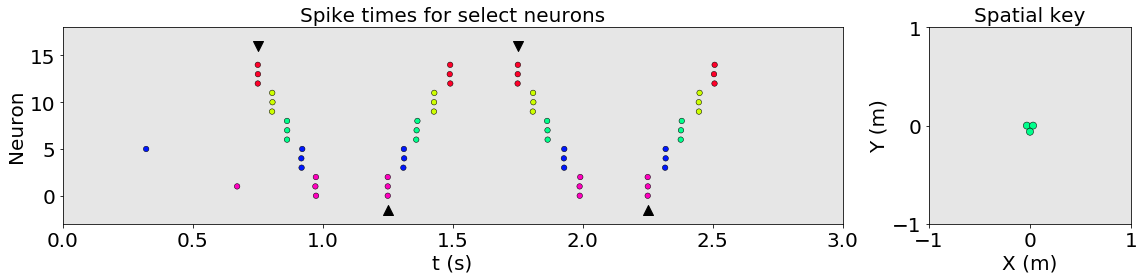

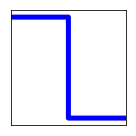

In [2]:
s = copy(S)
s['RNG_SEED'] = 1
s['TRJ'] = [(-2, 1.75), (0, 1.75), (0, -1.75), (2, -1.75)]

print('Running smln...')
rslt = smln.run(M, s)
print('Smln complete.')

# make plots
plot.heat_maps(rslt, cmap='gist_rainbow');

plot.raster(
    rslt,
    xys=[
    (-1.75, 1.75), (0, 1.75), (0, 0), (0, -1.75), (1.75, -1.75),  # trj
    ],
    colors=np.linspace(1, 0, 5),
    cmap='gist_rainbow',
    nearest=3,
    epoch='replay',
    trg_plt=[(16, 'v'), (-1.5, '^'), (16, 'v'), (-1.5, '^')],
    y_lim=(-3, 18),
    y_ticks=np.linspace(0, 15, 4),
    title='Spike times for select neurons',
)

# plot trj
trj = smln.build_trj(s)
fig, ax = plt.subplots(1, 1, figsize=(2, 2), tight_layout=True)
ax.plot(trj['x'], trj['y'], lw=5, color='b')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

ax.set_aspect('equal')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

set_font_size(ax, 20);

rslts = [rslt]